# 例題１

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = ct.tf('s')
P = (s+2)/(s**3 + 2*s**2 + 3*s + 4)

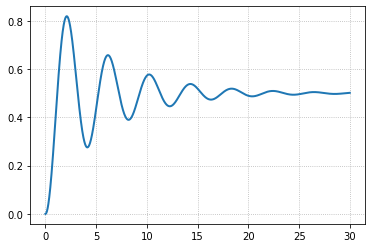

In [3]:
t, y = ct.step_response(P, np.arange(0, 30, 0.01))
plt.plot(t, y, lw=2)
plt.grid(ls=':')

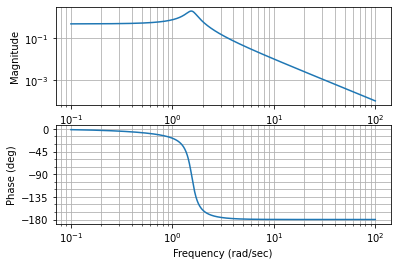

In [4]:
mag, phase, omega = ct.bode(P)

# 例題２

In [7]:
import control as ct
import numpy as np

In [5]:
A = np.array([[ 0, 1, 0, 0],
      [0, -5.9, -0.6, 0.001],
      [0, 0, 0, 1],
      [0, 21.1, 37.3, -0.04] ]);
B = np.array([ [0], [0.6], [0], [-2.1] ]);

In [6]:
P = ct.ss(A, B, np.eye(4), np.zeros([4,1]) );
print('Poles:', P.pole()) # システムの極

Q = np.diag([100, 1, 200, 1]); 
R = 0.5;
K, _,  _ = ct.lqr(A, B, Q, R) # 最適レギュレータの設計
K = -K
print('K:', K[0])

L = ct.ss(A, B, -K, 0); # 開ループ系
[mag, phase, wgc, wpc] = ct.margin(L); # 安定余裕
print('Phase Margin:', phase)

Poles: [ 0.         -7.00913635 -4.93143042  6.00056677]
K: [14.14213562 28.25381947 90.73657908 14.76461765]
Phase Margin: 62.32053240606899
